# THY AI MODELS

## Install and Import Libraries

In [1]:
# Install Yolov5
!git clone https://github.com/ultralytics/yolov5  

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
# Install depencies
!cd yolov5 && pip install -qr requirements.txt  

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     --------------------------------------   3.0/3.1 GB 2.8 MB/s eta 0:00:35


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\akdog\.conda\envs\beevision\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\akdog\.conda\envs\beevision\lib\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\akdog\.conda\envs\beevision\lib\site-packages\pip\_vendor\urllib3\response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\akdog\.conda\envs\beevision\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 94, in read
    self.__buf.write(data)
  File "C:\Users\akdog\.conda\envs\beevision\lib\tempfile.py", line 481, in func_wrapper
    return func(*args, **kwargs)
OSError: [Errno 28] No space left on device

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\akdog\.conda\en

In [19]:
# for labeling process
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [20]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\akdog/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-4-23 Python-3.7.9 torch-1.13.1+cpu CPU

Fusing layers... 


requirements: C:\Users\akdog\.cache\torch\hub\requirements.txt not found, check failed.


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model 

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
img = 'https://static.standard.co.uk/2023/01/10/05/b5a3d232395a7831ff1e3f9fa22e1eb8Y29udGVudHNlYXJjaGFwaSwxNjczMzYwMjg2-2.70363808.jpg?width=1200&auto=webp&quality=75'

In [5]:
results = model(img)
results.print()

image 1/1: 800x1200 23 cars, 3 trucks
Speed: 426.0ms pre-process, 215.0ms inference, 1.5ms NMS per image at shape (1, 3, 448, 640)


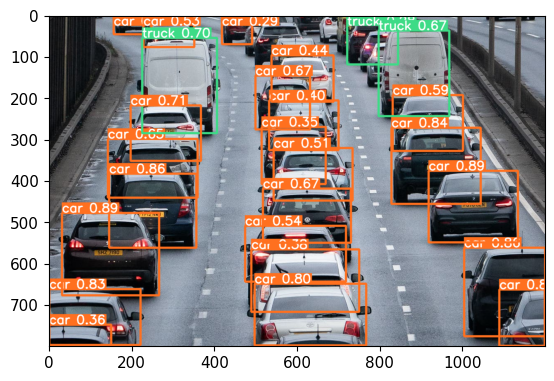

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Custom Object Model

In [53]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 32 --data C:\Users\akdog\Desktop\thy\yolov5/dataset.yaml --weights yolov5s.pt --workers 2

^C


In [8]:
# custom object detection model load 
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp24/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\akdog/.cache\torch\hub\master.zip
YOLOv5  2023-4-23 Python-3.7.9 torch-1.13.1+cpu CPU

Fusing layers... 


requirements: C:\Users\akdog\.cache\torch\hub\requirements.txt not found, check failed.


Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [54]:
# take any image for try model
img = os.path.join('data', 'images', 'box.jpg')

In [55]:
#  detection process
results = model(img,312)

In [56]:
results.print()

image 1/1: 1144x2263 3 cargos
Speed: 113.5ms pre-process, 156.2ms inference, 15.6ms NMS per image at shape (1, 3, 160, 320)


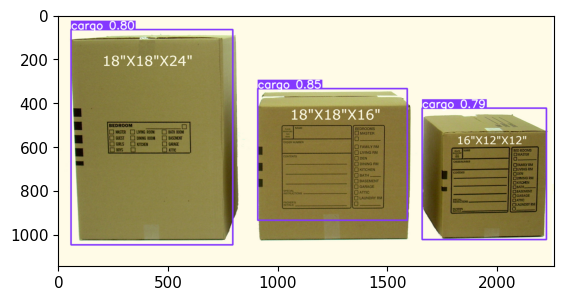

In [57]:
# visualize the result
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [58]:
img = cv2.imread(img)

In [59]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

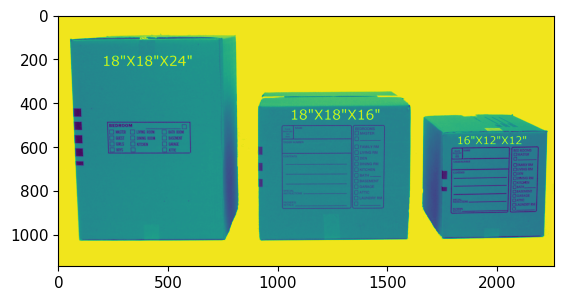

In [60]:
import matplotlib.pyplot
plt.imshow(gray)

In [61]:
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

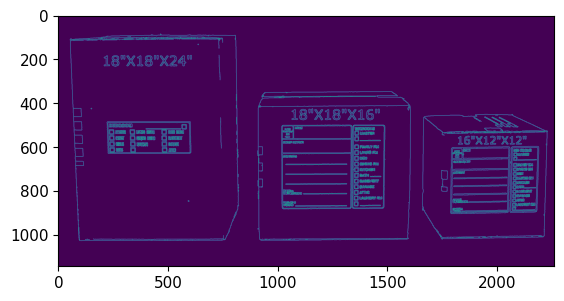

In [62]:
plt.imshow(edges)

In [63]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [64]:
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    print('Width: {}, Height: {}'.format(w, h))
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

Width: 3, Height: 1
Width: 2, Height: 1
Width: 1, Height: 1
Width: 3, Height: 1
Width: 4, Height: 1
Width: 131, Height: 3
Width: 4, Height: 2
Width: 1, Height: 1
Width: 2, Height: 1
Width: 1, Height: 1
Width: 1, Height: 1
Width: 1, Height: 1
Width: 2, Height: 1
Width: 2, Height: 1
Width: 1, Height: 1
Width: 4, Height: 1
Width: 1, Height: 1
Width: 1, Height: 1
Width: 5, Height: 1
Width: 4, Height: 1
Width: 1, Height: 1
Width: 5, Height: 2
Width: 10, Height: 2
Width: 38, Height: 3
Width: 5, Height: 1
Width: 4, Height: 1
Width: 11, Height: 3
Width: 12, Height: 3
Width: 6, Height: 2
Width: 651, Height: 7
Width: 3, Height: 4
Width: 1, Height: 1
Width: 5, Height: 4
Width: 35, Height: 1
Width: 37, Height: 1
Width: 1, Height: 1
Width: 2, Height: 2
Width: 6, Height: 1
Width: 2, Height: 1
Width: 1, Height: 1
Width: 1, Height: 1
Width: 1, Height: 1
Width: 7, Height: 2
Width: 1, Height: 4
Width: 1, Height: 1
Width: 6, Height: 1
Width: 2, Height: 1
Width: 208, Height: 7
Width: 1, Height: 1
Width: 1